# Supervised Learning Final Project

I'm taking this course as an elective and am very new to Jupyter Notebooks.  I'll try to present the results in the order of the rubric and make this easy on you. If it isn't working correctly for you, please message me and I'll fix it and try to resubmit.

# Project topic: Is there a clear explanation of what this project is about? Does it state clearly which type of problem? E.g. type of learning and type of the task.
I found some data that lists what wine tasters determined was the quality of a wine (on a scale of 0 to 10) vs 10 chemical properties of the wine that were measured in a laboratory. This project is to predict what a wine taster will rate a wine based on a chemical analysis of that wine. As a side project (which is part of data cleaning anyway), an attempt will be made to determine if any of the input features appear to be unrelated the the quality assessment. // This is a supervised multiple linear regression problem (multi-class task). I plan to explore a forward step-wise refinement. // I'm adding this after completing the analysis. This data also lends itself to classification. I went back and added Ababoost, SVM, SVC, and a "hybrid" method I read about in the uder manual.

# Project topic: Is the goal of the project clearly stated? E.g. why it’s important, what goal the author wants to achieve, or wants to learn.
My spouse is a chemist and it seems logical that a great wine is a combination of chemical factors that can be measured in a laboratory.  If there was a set of parameters that were known to lead to a great wine, then it might be possible for wine makers to focus their efforts on achieving those chemical conditions.  I'm in the Electrical Engineering program.  My personal goal is to get a chance to explore the capabilities of the Python libraries to help solve these types of problems.  This will help to find places in my own field where these tools can be put to good use.

# Data: Is the data source properly cited and described? (including links, brief explanations)
This data comes from the UCI website that was provided in the problem description (https://archive.ics.uci.edu/dataset/186/wine+quality).  It is a public source but for research purposes only.  It is from "Vinho Verde" wines which is in the North of Portugal.  Expert wine tasters evaluated the wines on a scale of 0 (very bad) to 10 (very excellent).  The listed quality is the median of at least 3 different evaluators.  The features came from laboratory analysis.

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

# Data: Is the data description explained properly? The data description should include the data size.
I am using the data from the white wine.  There are 4898 samples, 11 chemical features, and 1 output column.  Thus the data file is a 4898 x 12 matrix.  The chemical features are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, & alcohol.  All of the entries are numeric.

It is not possible to proceed in the rubric without code.  As such, I'll begin to load and work on the data.  The 'text' blocks will resume below with 'data cleaning.'

In [1]:
# import required libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# My plan is to include this data file with the notebook.  If you can't find it, then please download it from the GitHub site in Part #3 of the assignment 
df = pd.read_csv('data/winequality-white.csv', sep=';') 

# The feature names have spaces and these are being changed to underscore
df.columns = df.columns.str.replace(' ', '_')

#These prints show a bit of what the data looks like.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [2]:
# This section was to normalize the data, but I later determined that this was not required.
#df.pH=np.divide(df.pH,df.pH.median())
#df.alcohol=np.divide(df.alcohol,df.alcohol.median())
#df.residual_sugar=np.divide(df.residual_sugar,df.residual_sugar.median())
#df.fixed_acidity=np.divide(df.fixed_acidity,df.fixed_acidity.median())
#df.total_sulfur_dioxide=np.divide(df.total_sulfur_dioxide,df.total_sulfur_dioxide.median())
#df.density=np.divide(df.density,df.density.median())

In [3]:
# checking for null features
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 
# it appears that the data 

fixed_acidity 0 0
volatile_acidity 0 0
citric_acid 0 0
residual_sugar 0 0
chlorides 0 0
free_sulfur_dioxide 0 0
total_sulfur_dioxide 0 0
density 0 0
pH 0 0
sulphates 0 0
alcohol 0 0
quality 0 0


# Data Cleaning 1. Does it include clear explanations on how and why a cleaning is performed? 2. Does it have conclusions or discussions? 3. Does it have proper visualizations?
I'm writing these notes here, but data cleaning continued until near the end of the project.  This is an appropriate space to discuss the conclusions because I'm following the order of the rubric to make the grading easier.  You can find the relevant code sections as you scroll through the notebook.  I did not know anything about this data so it was appropriate to attempt a cleaning simply because I didn't know for sure what was in there.  

For Parts a & b, it turns out that there not any empty spots in the matrix nor were there any non-numeric entries. The code for checking this is above. 

For Part c (dropping of features), it seemed logical to me to drop the features of density (I can't see how you would be able to taste this) and pH (which is really a byproduct of the acids in the wine which have been directly measured in other features).  As it turns out, they are both statistically significant. My feeling is that they are co-linear or nearly co-linear with other chemical attributes of the wine that are not presented as features.  Remarkably, citric acid and free sulfur dioxide both ended up being statistically insignificant and were dropped.  I used the .drop command to remove them.  This was surprising since I know what they both taste like.  I have a difficult time believing they do not contribute to the quality ranking of a wine.  However, from this data, it is clear that they don't.

For Part d (outliers), this data is unbalanced.  It is a very good representation of "average" wines.  There are very few high end "excellent" and very few low end "poor" wines.  These data points look like outliers, but in reality are the small number of samples that are not average.  It was not appropriate to remove them.  Aside from those, I removed a total of 11 outliers from the data.  I checked to make sure that these points were for average quality wines and not on the high or low end of quality.  The 9 points represent only 0.18% of the data set, but they had a remarkable impact on the results.  These finding will be discussed in the results section below.

An additional issue was that the feature names contained spaces.  Probably no big deal for the data science students, but for the EE elective student it was causing coding issues.  It took me longer than it should have, but I was able to use .columns.str.replace(' ', '_') to rename the features in a way that I was then able to code.

The rubic discussion will continue with EDA below.

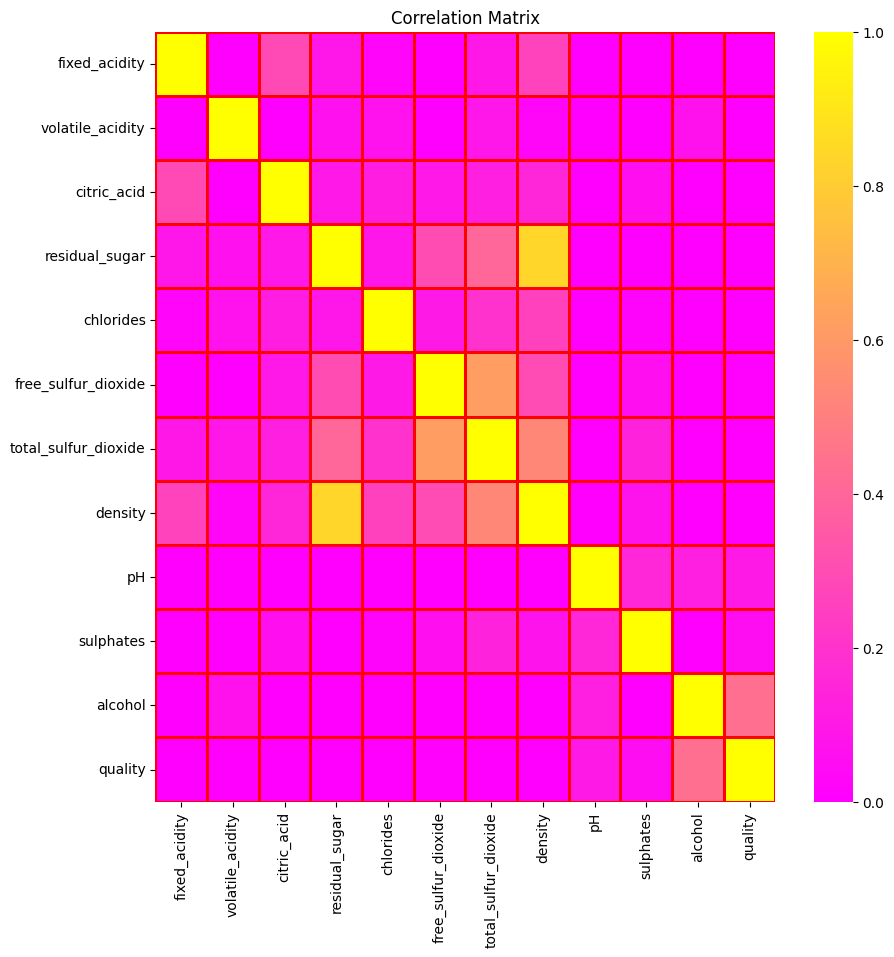

In [4]:
# This code creates a correlation matrix from the data before cleaning
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap="spring", linecolor="red", linewidths=1, yticklabels='auto')
plt.title("Correlation Matrix")
plt.show()

/home/crank/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Pair Plot (Before Data Cleaning)')

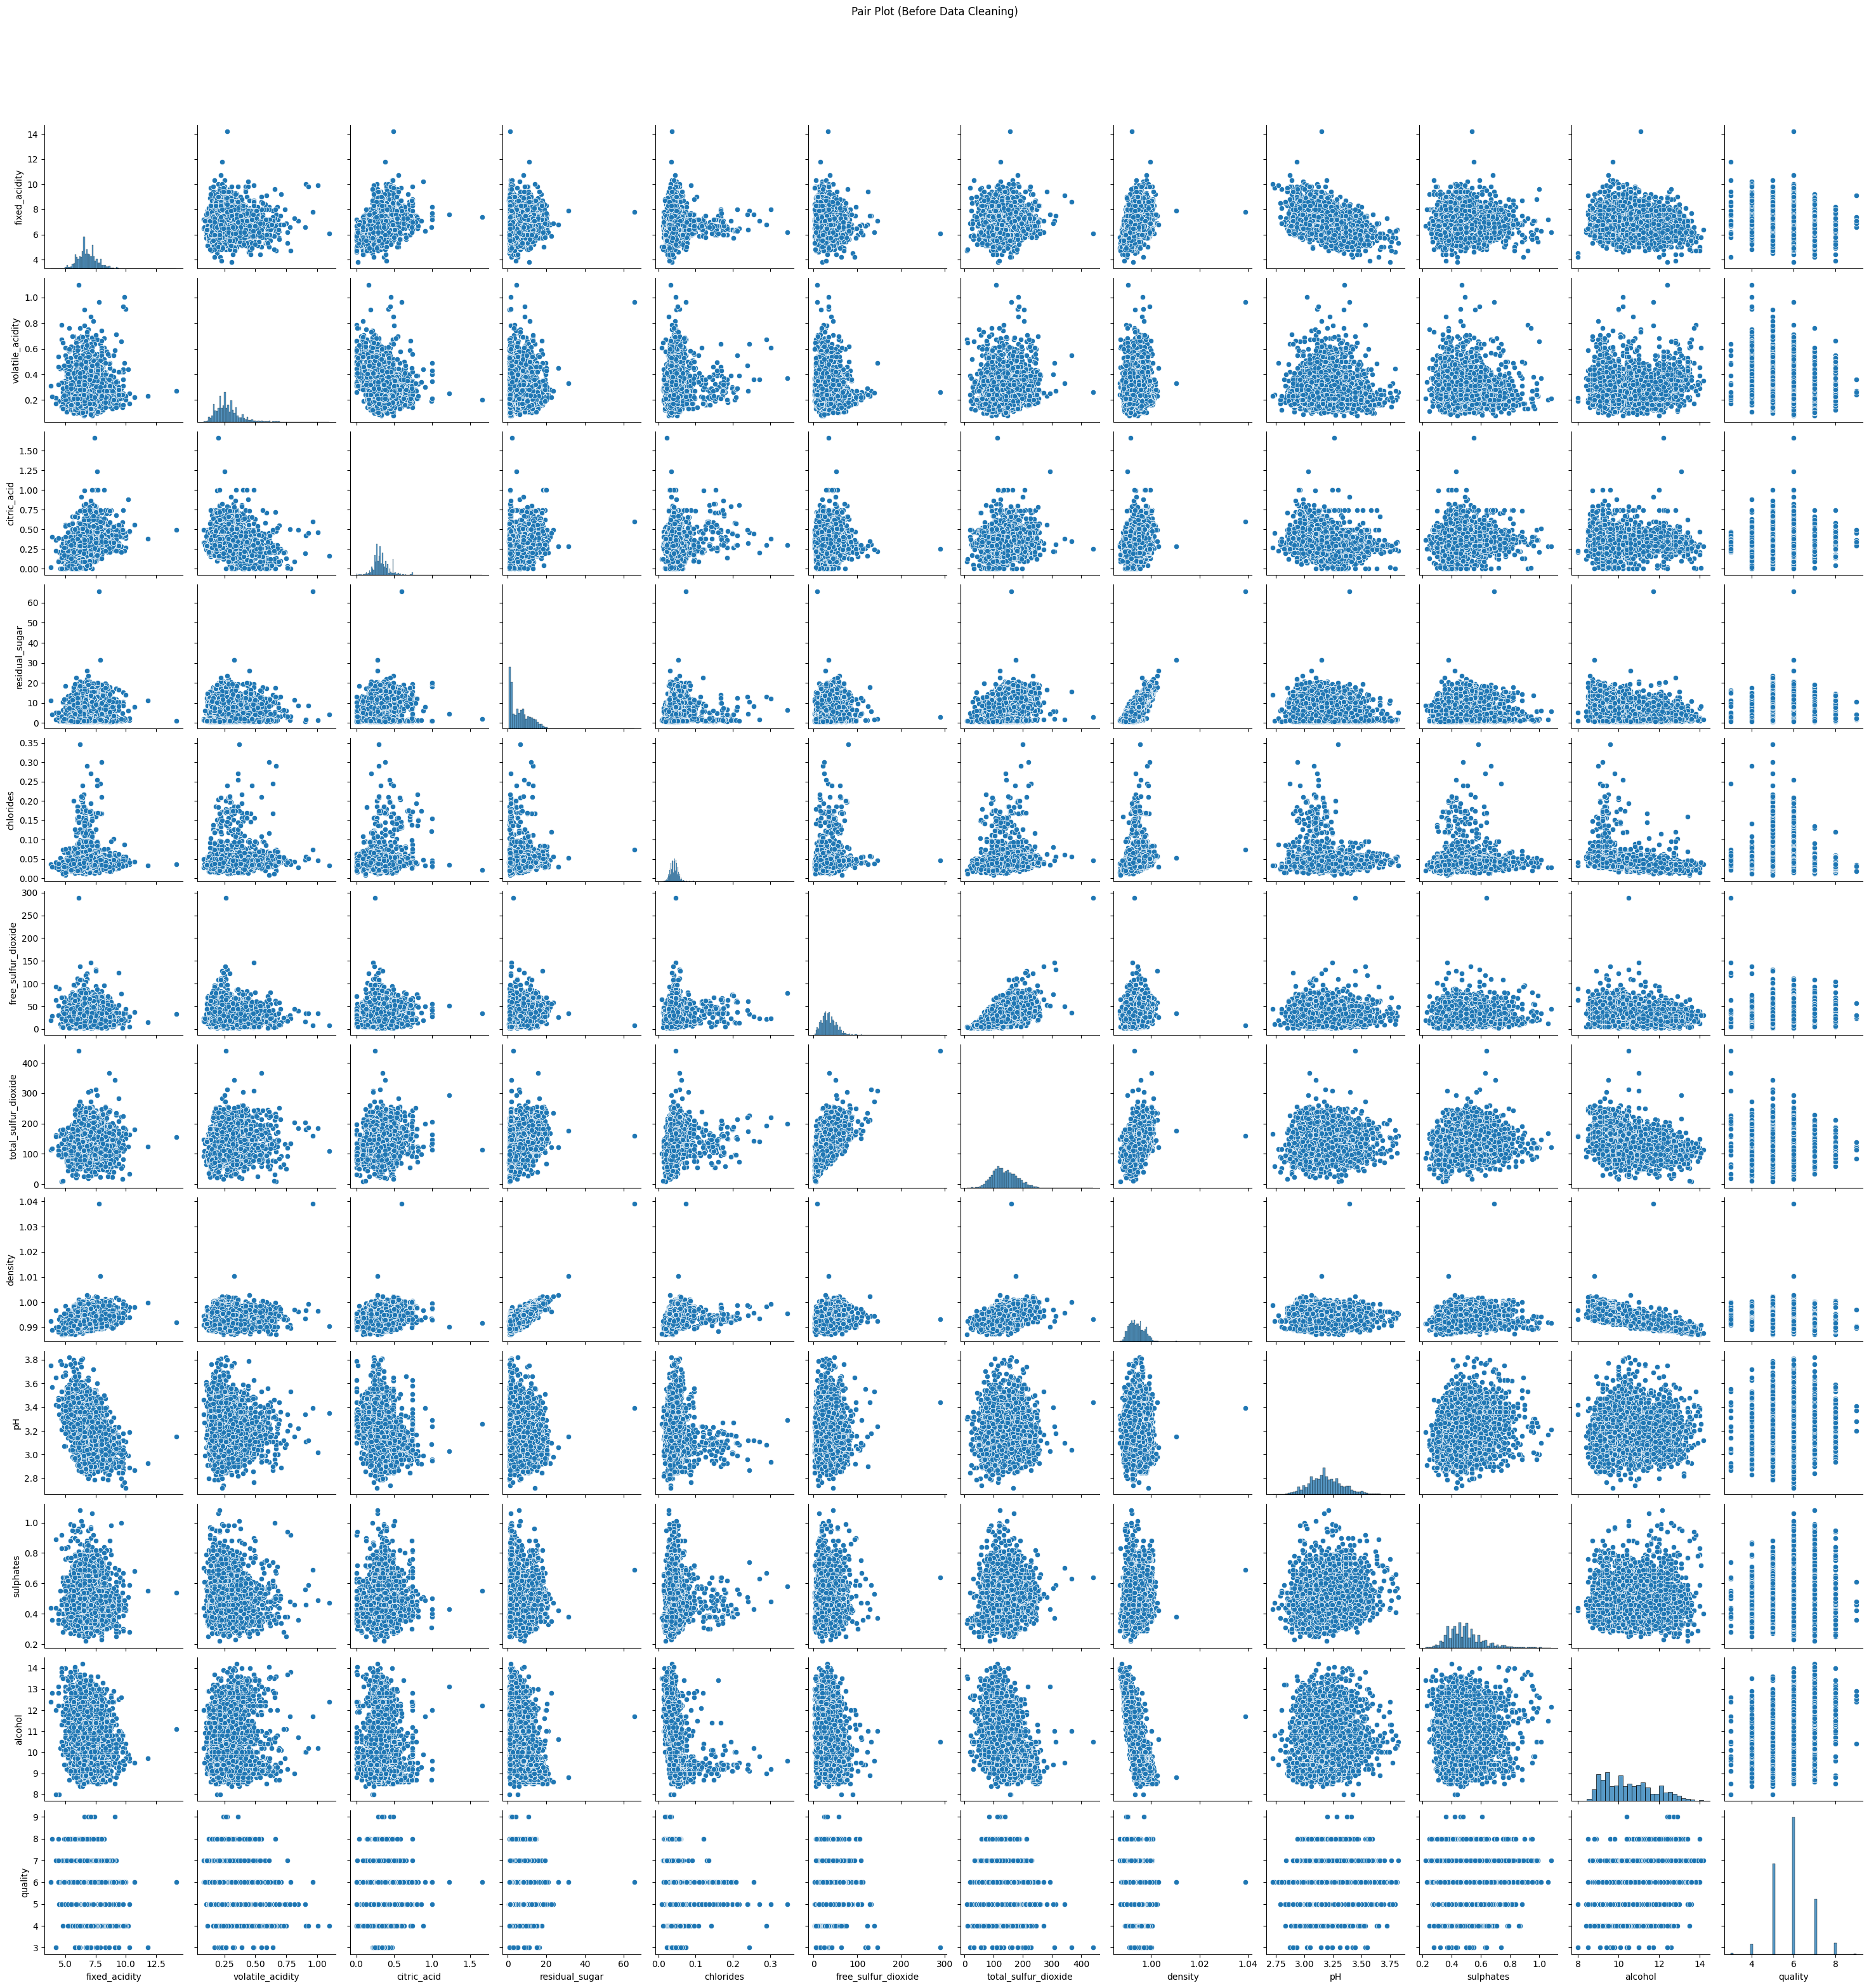

In [5]:
# This is a pair plot of the data before cleaning.  You can see some of the outliers.  Additionally you can see the interrelation between
#   density/residual sugar and total/free sulfur dioxide.
sns.pairplot(df).fig.suptitle('Pair Plot (Before Data Cleaning)', y=1.05)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     64.08
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.48e-15
Time:                        09:48:01   Log-Likelihood:                -6322.8
No. Observations:                4898   AIC:                         1.265e+04
Df Residuals:                    4896   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.6956      0.103     65.057

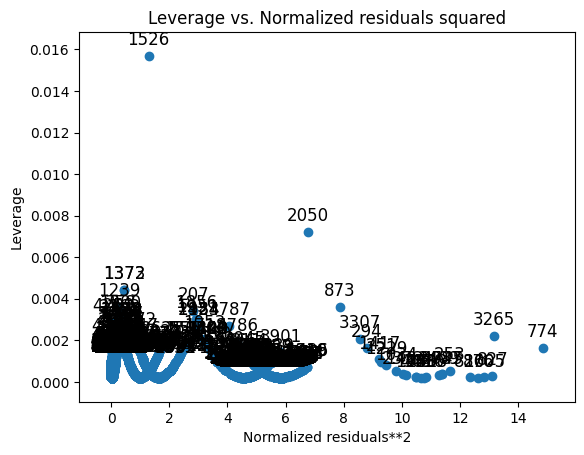

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     193.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           4.67e-43
Time:                        09:48:04   Log-Likelihood:                -6260.0
No. Observations:                4898   AIC:                         1.252e+04
Df Residuals:                    4896   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3540      0.036  

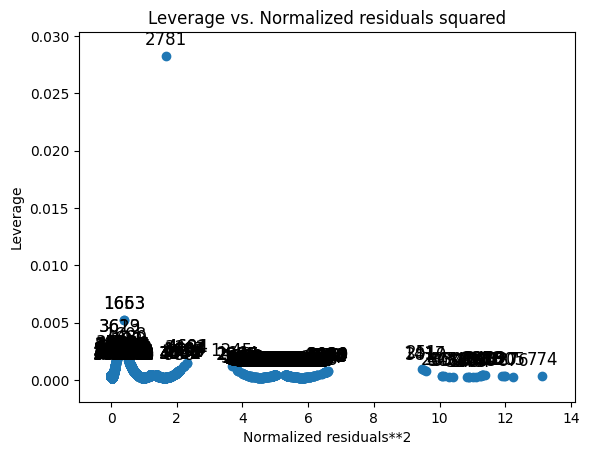

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     225.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           6.51e-50
Time:                        09:48:08   Log-Likelihood:                -6244.2
No. Observations:                4898   AIC:                         1.249e+04
Df Residuals:                    4896   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2674      0.029    218.166      0.0

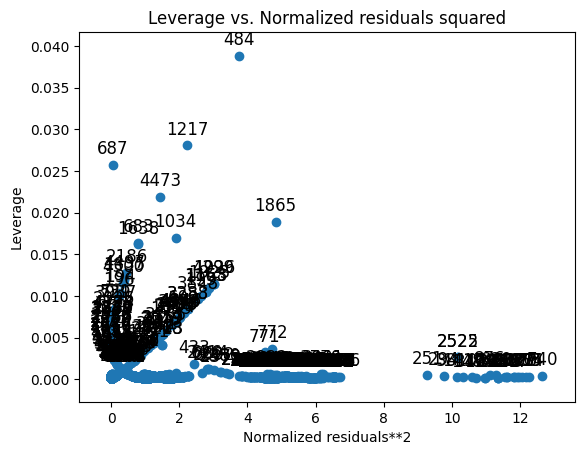

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3259
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.568
Time:                        09:48:12   Log-Likelihood:                -6354.5
No. Observations:                4898   AIC:                         1.271e+04
Df Residuals:                    4896   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.8629    

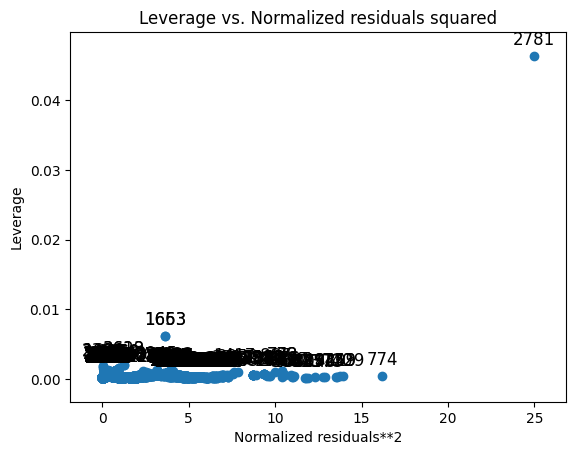

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     48.88
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           3.08e-12
Time:                        09:48:16   Log-Likelihood:                -6330.3
No. Observations:                4898   AIC:                         1.266e+04
Df Residuals:                    4896   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0187      0.266     15.095      0.0

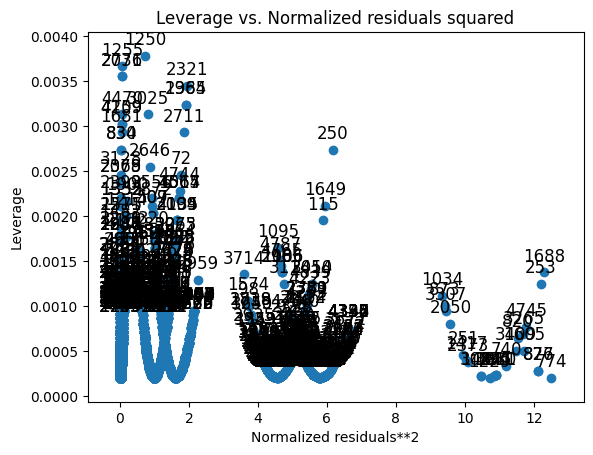

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.15
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           0.000171
Time:                        09:48:20   Log-Likelihood:                -6347.6
No. Observations:                4898   AIC:                         1.270e+04
Df Residuals:                    4896   BIC:                         1.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6739      0.056    101.863      0.0

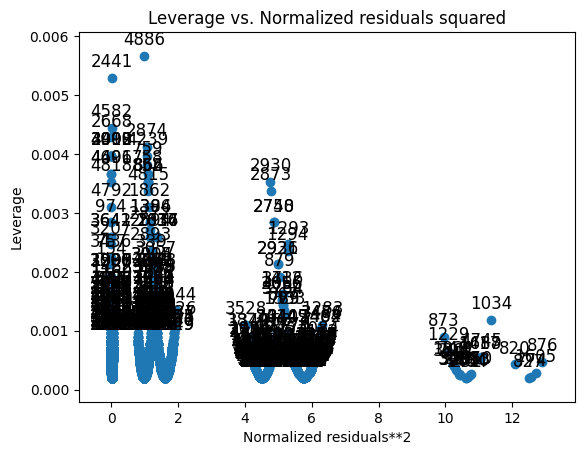

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          5.61e-226
Time:                        09:48:26   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5820      0.098     26.345      0.0

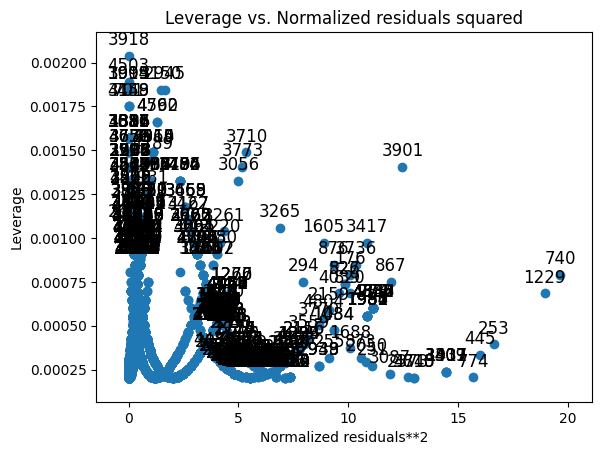

In [6]:
# This section of code generates OLS summeries and leverage to normalized square residuals.  The OLS was used to 
#   assess P factors while the plots helped to identify outliers.  It was an itterative process and here you see the final
#   results.  I did not throw out the outliers in features that ended up contributing to the regression model.
import statsmodels.api as sm
import statsmodels.formula.api as smf 
model = smf.ols(formula='quality ~ fixed_acidity', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

# no points were dropped based on volatile acidity
model = smf.ols(formula='quality ~ volatile_acidity', data=df).fit()
print(model.summary())

# This feature gets dropped so I eliminated the plots
model = smf.ols(formula='quality ~ citric_acid', data=df).fit()
print(model.summary())

model = smf.ols(formula='quality ~ residual_sugar', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

model = smf.ols(formula='quality ~ chlorides', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

# This feature gets dropped so I eliminated the plots
model = smf.ols(formula='quality ~ free_sulfur_dioxide', data=df).fit()
print(model.summary())

# no points were dropped based on total sulfur dioxide
model = smf.ols(formula='quality ~ total_sulfur_dioxide', data=df).fit()
print(model.summary())


model = smf.ols(formula='quality ~ density', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

model = smf.ols(formula='quality ~ pH', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

model = smf.ols(formula='quality ~ sulphates', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

model = smf.ols(formula='quality ~ alcohol', data=df).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [7]:
# These print commands show that the 'to be dropped' features represent average quality wines
# The goal here is to not drop a very low or very high quality wine which are themselves outliers
print(df.quality[1525])
print(df.quality[2781])
print(df.quality[1653])
print(df.quality[2441])
print(df.quality[4886])
print(df.quality[3918])
print(df.quality[4503])
print(df.quality[1663])
df_clean=df.drop([1526, 2781,1653,2441,4886,3918,4503,1663,4039], axis=0) # Outlier points get dropped

# This line shows that the total number of dropped results equates to about 0.18%
print(9/4898*100)

5
6
6
6
7
7
7
6
0.18374846876276033


/home/crank/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Pair Plot (After Data Cleaning)')

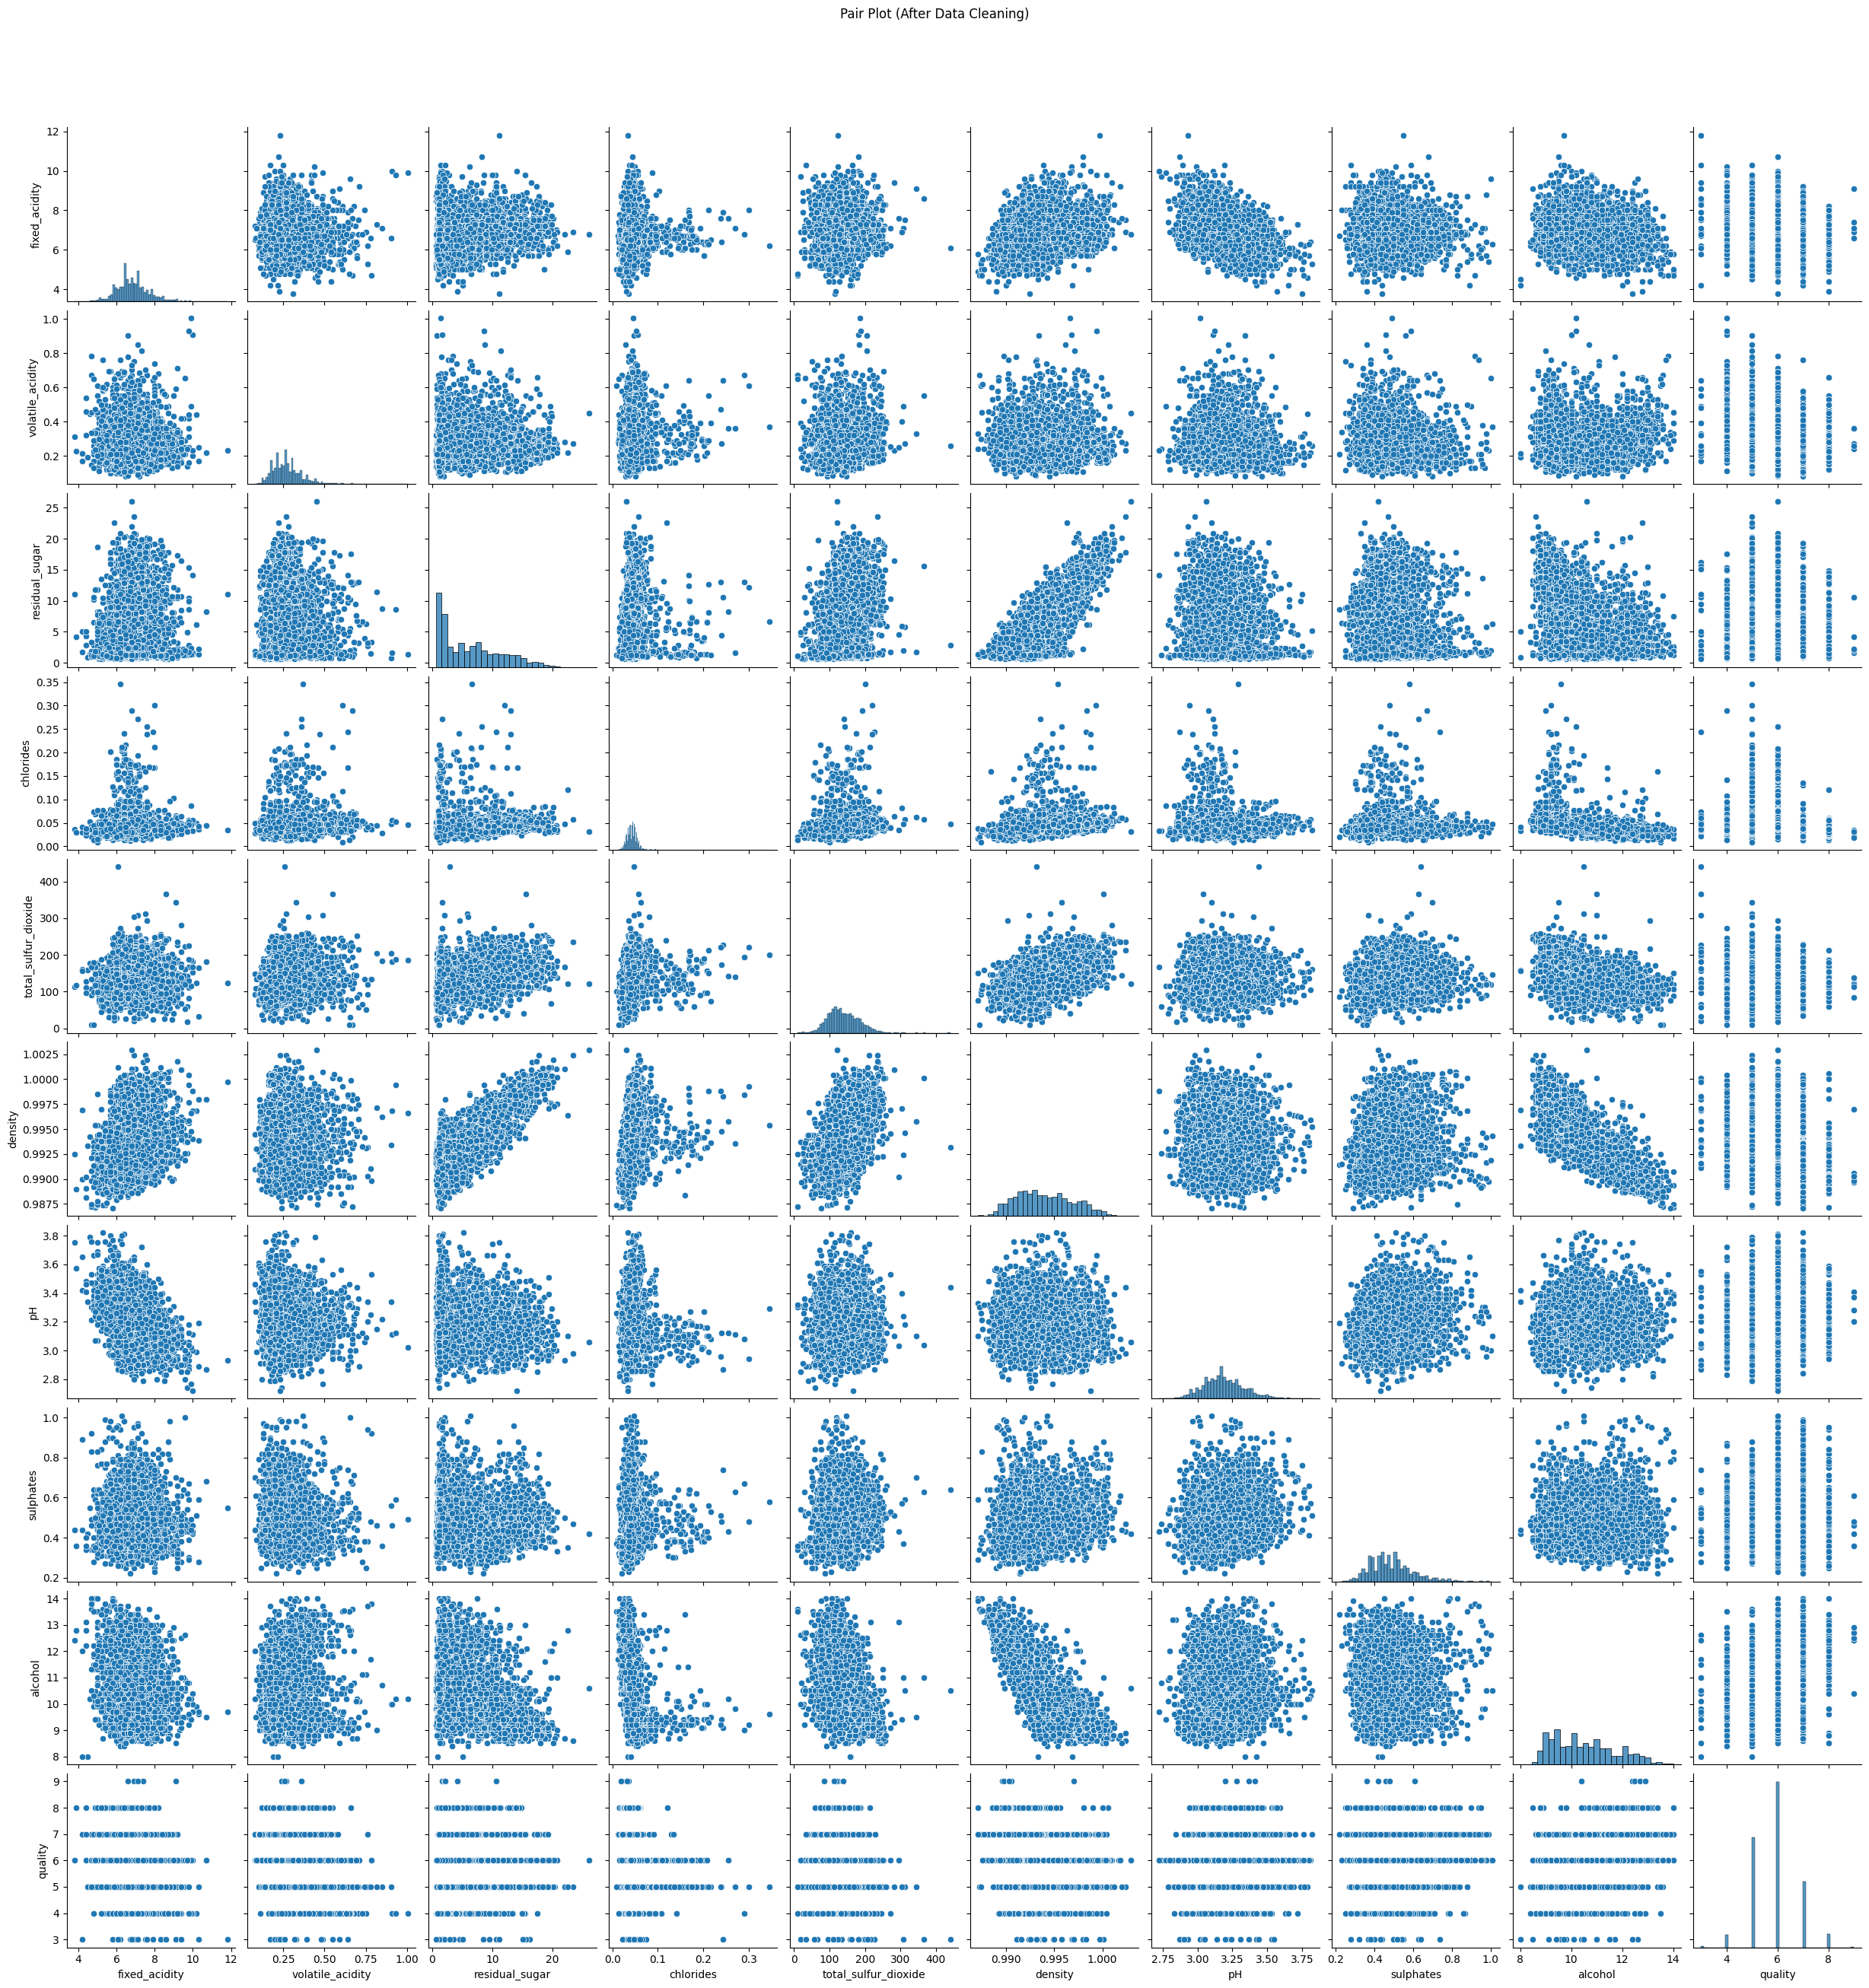

In [8]:
# These features are statistically insignificant and are thus removed
df_clean=df_clean.drop(['citric_acid','free_sulfur_dioxide'], axis=1)

# This plot is with the clean data.  It shows the major outliers are removed and with 2 less features, it is easier to look at
sns.pairplot(df_clean).fig.suptitle('Pair Plot (After Data Cleaning)', y=1.05)

# Exploratory Data Analysis 1. good analysis and conclusions / discussions  2. correlation matrix with analysis
I began EDA with a heat map (correlation matrix) to explore which features were the most significant and which might be co-linear or otherwise closely related to each other.  The most significant feature to the wine's quality is the alcohol content.  This is quite comical to me (I wonder if beer is the same way).  The next most significant feature is the density.  As discussed above, this was not obvious me as it isn't something that I think would impact my enjoyment of a wine.  It is interesting that density is related to residual sugar which I could see as something that impacts the quality.  However, residual sugar and quality are not closely correlated.  Free and total sulfur dioxide are closely related, which isn't a surprise.

# Exploratory Data Analysis 3. Extra EDA
I then moved into OLS regression results and a search for outliers.  The OLS results showed very high P factors on citric acid and free sulfur dioxide.  These features were removed from the analysis.  This also solved the issue of free and total sulfur dioxide being so closely related.  I also found several outliers that were not related to extreme high or low quality wine so I dropped them as well.  These were fond by examining the leverage vs normalized squared residual in the plots above.  The second pair plot seems to have eliminated the outliers and it ready for the methods to be applied.

As a side note, you can see in the pair plot of quality vs quality that this is an average collection of wine.  The data set is unbalanced.  This will be discussed again in the final results.

In [9]:
# This section splits the data into training and test sections.  It is 80% training and 20% test.  
#   I have 2 pairs of training/test data.  One set uses the original data and one contains the clean data.
#   I did this so I could see with witch methods clean data was more or less important.
from sklearn.model_selection import train_test_split
train_wine, test_wine = train_test_split(df[:], train_size=3918, random_state=1) #11
train_wine_clean, test_wine_clean = train_test_split(df_clean[:], train_size=3918, random_state=0) #6 9

# Models - Is the choice of model(s) appropriate for the problem?
The initial analysis is done with a multiple linear regression method. I utilized a forward step-wise refinement as was done in the Week 2 assignment.  This method is appropriate.  All of the features and the dependent variable (quality) are numeric.

# Models - Is the author aware of whether interaction/colinearity between features can be a problem for the choice of the model?
I am aware.  Free and total sulfur dioxide are highly correlated.  However, the P factor for free sulfur dioxide was very high indicating it was statistically insignificant.  It was 1 of 2 dropped features, so this issue solved itself.

Density and residual sugar were also related to each other.  In the next block is a comparison of those 2 features.  The P factor between them was zero, so they were both retained.  In the results, density is the most important feature after alcohol.  Residual sugar is next in line and was crucial to the success of the analysis.  I assess that these features are related but not colinear.

In [10]:
#This print shows a 0 p factor between density and residual sugar
model = smf.ols(formula='density ~ residual_sugar', data=df_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:19   Log-Likelihood:                 24511.
No. Observations:                4889   AIC:                        -4.902e+04
Df Residuals:                    4887   BIC:                        -4.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9909   3.74e-05   2.65e

# Models Did the author use multiple (appropriate) models?
Quality is reported as a discrete number from 0 to 10.  However, you could consider those numbers to be their English equivalents.  For example 0 is very bad and 10 is very excellent.  It is just as appropriate to treat this problem as a classification problem.  As such, I also applied AbaBoost (Decision Tree), SVC, and SVM models to this problem.  They are located much further down the notebook, but I listed them here to help with the grading rubric.

# Models Did the author investigate which features are important by looking at feature rankings or importance from the model?
This is the next several code sections.  I used the same forward step-wise refinement from Week 2.  The process begins with identifying the most important feature.  This was acutally done above where quality is compared with the various features.  The highest R squared was when quality was compared with alcohol.  This is the starting point.  From here forward, the next most important feature is calculated and then added into the regression model.  This continues until all the features are used.  Using all of them is a bit of an overkill, but I'll save that for the results section below.

# Models Did the author investigate hyperparameter tuning
Yes, in the SVM and SVC section there is an iteration to find the best C (and gamma for SVM) just as was done in Week 6.  I have added comments to help you find it.  For the AdaBoost an iteration was done to see how the boost iteration impacted the results.  I also changed the code to run an iteration to help me guess as to the best setting for max_depth.  I found this to be 12 and then changed the code back to look at the boost iteration.

# Models Did the author investigate other techniques such as cross validation
Yes, cross validation is part of SVM and SVC.  There are comments in that section to help you find it.

# Models Did the author investigate models not covered in class
Yes, the final section is what I call a hybrid model.  It is a strong method using another weaker method at the estimator.  For my case the decision tree was the strong method being supplemented with SVC as the weaker method.  I read about it in the SKLearn manual.  That being said, the results section will show it didn't work as well as I had hoped.

In [11]:
# Begin multiple linear regression forward step-wise refinement
allowed_factors = ['fixed_acidity', 'density', 'volatile_acidity', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates']
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='alcohol~'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

fixed_acidity 0.013900563603392646
density 0.5952878714937159
volatile_acidity 0.0035969207319052066
residual_sugar 0.19700288788867137
chlorides 0.13470897602249032
total_sulfur_dioxide 0.199193660175491
pH 0.018210748338745364
sulphates 8.332430946311753e-05
best: ['density', 0.5952878714937159]


In [12]:
# In the above code, 'density' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine1 = smf.ols(formula='alcohol~density', data=train_wine).fit()
train_wine1_clean = smf.ols(formula='alcohol~density', data=train_wine_clean).fit()

# density has been removed from the allowed factors
allowed_factors1 = ['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates']
best = ['',0]
for p in allowed_factors1:
    model  = smf.ols(formula='alcohol~density+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine1.summary())

fixed_acidity 0.6034861613932163
volatile_acidity 0.6033616565832955
residual_sugar 0.739674936789877
chlorides 0.6245669420134282
total_sulfur_dioxide 0.5975331334428213
pH 0.5982908747250579
sulphates 0.5971101754565841
best: ['residual_sugar', 0.739674936789877]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     5760.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:19   Log-Likelihood:                -4579.1
No. Observations:                3918   AIC:                             9162.
Df Residuals:                    3916   BIC:                             9175.
Df Model:                           1                                         
Covariance Type:       

In [13]:
# In the above code, 'residual sugar' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine2 = smf.ols(formula='alcohol~density+residual_sugar', data=train_wine).fit()
train_wine2_clean = smf.ols(formula='alcohol~density+residual_sugar', data=train_wine_clean).fit()

# residual sugar has been removed from the allowed list
allowed_factors2 = ['fixed_acidity', 'volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates']
best = ['',0]
for p in allowed_factors2:
    model  = smf.ols(formula='alcohol~density+residual_sugar+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine2.summary())

fixed_acidity 0.7752761468064586
volatile_acidity 0.7436200902622895
chlorides 0.7465237474698482
total_sulfur_dioxide 0.7398703145143152
pH 0.7583464870098088
sulphates 0.7503396898828016
best: ['fixed_acidity', 0.7752761468064586]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     5562.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:                -3714.7
No. Observations:                3918   AIC:                             7435.
Df Residuals:                    3915   BIC:                             7454.
Df Model:                           2                                         
Covariance Type:            nonrobust                   

In [14]:
# In the above code, 'fixed acidity' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine3 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity', data=train_wine).fit()
train_wine3_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity', data=train_wine_clean).fit()

# fixed acidity has been removed from the allowed list
allowed_factors3 = ['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates']
best = ['',0]
for p in allowed_factors3:
    model  = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine3.summary())

volatile_acidity 0.7794501384413411
chlorides 0.778847790895687
total_sulfur_dioxide 0.7753046631652176
pH 0.8451993044934307
sulphates 0.7894203389899284
best: ['pH', 0.8451993044934307]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     4501.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:                -3426.6
No. Observations:                3918   AIC:                             6861.
Df Residuals:                    3914   BIC:                             6886.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     c

In [15]:
# In the above code, 'pH' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine4 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH', data=train_wine).fit()
train_wine4_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH', data=train_wine_clean).fit()

# pH has been removed from the allowed list
allowed_factors4 = ['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'sulphates']
best = ['',0]
for p in allowed_factors4:
    model  = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine4.summary())

volatile_acidity 0.8496417013509513
chlorides 0.8452173964024476
total_sulfur_dioxide 0.8452046567944764
sulphates 0.8540031162163126
best: ['sulphates', 0.8540031162163126]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     5341.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:                -2696.5
No. Observations:                3918   AIC:                             5403.
Df Residuals:                    3913   BIC:                             5434.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err

In [16]:
# In the above code, 'sulphates' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine5 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates', data=train_wine).fit()
train_wine5_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates', data=train_wine_clean).fit()

# sulphates was been removed from the allowed list
allowed_factors5 = ['volatile_acidity', 'chlorides', 'total_sulfur_dioxide']
best = ['',0]
for p in allowed_factors5:
    model  = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine5.summary())

volatile_acidity 0.8588195684076375
chlorides 0.8540032883817674
total_sulfur_dioxide 0.8540441408371025
best: ['volatile_acidity', 0.8588195684076375]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     4577.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:                -2581.7
No. Observations:                3918   AIC:                             5175.
Df Residuals:                    3912   BIC:                             5213.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|

In [17]:
# In the above code, 'volatile acidity' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine6 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity', data=train_wine).fit()
train_wine6_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity', data=train_wine_clean).fit()

# volatile acidity has been removed from the allowed list
allowed_factors6 = ['chlorides', 'total_sulfur_dioxide']
best = ['',0]
for p in allowed_factors6:
    model  = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine6.summary())

chlorides 0.8588441031977062
total_sulfur_dioxide 0.8589746843115678
best: ['total_sulfur_dioxide', 0.8589746843115678]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     3965.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:                -2516.0
No. Observations:                3918   AIC:                             5046.
Df Residuals:                    3911   BIC:                             5090.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

In [18]:
# In the above code, 'total sulfur dioxide' has been identified as the next most important feature.  It is added to the model and a new R rquared it calculated
train_wine7 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide', data=train_wine).fit()
train_wine7_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide', data=train_wine_clean).fit()

# total sulfur dioxide has been removed from the allowed list
allowed_factors7 = ['chlorides']
best = ['',0]
for p in allowed_factors7:
    model  = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide+'+p, data=train_wine).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
print(train_wine7.summary())

chlorides 0.85899592360854
best: ['chlorides', 0.85899592360854]
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     3402.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:                -2513.9
No. Observations:                3918   AIC:                             5044.
Df Residuals:                    3910   BIC:                             5094.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [19]:
# In the above code, 'clorides' has been identified as the only remaining feature.  It is added to the model and a new R rquared it calculated
train_wine8 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide+chlorides', data=train_wine).fit()
train_wine8_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide+chlorides', data=train_wine_clean).fit()


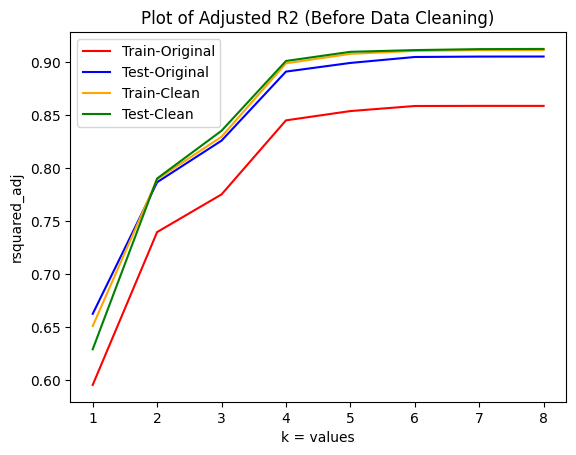

In [20]:
adjr2_train=[train_wine1.rsquared_adj,train_wine2.rsquared_adj,train_wine3.rsquared_adj,train_wine4.rsquared_adj,train_wine5.rsquared_adj,train_wine6.rsquared_adj,train_wine7.rsquared_adj,train_wine8.rsquared_adj]
#print(adjr2_train)
adjr2_train_clean=[train_wine1_clean.rsquared_adj,train_wine2_clean.rsquared_adj,train_wine3_clean.rsquared_adj,train_wine4_clean.rsquared_adj,train_wine5_clean.rsquared_adj,train_wine6_clean.rsquared_adj,train_wine7_clean.rsquared_adj,train_wine8_clean.rsquared_adj]
#print(adjr2_train_clean)

test_wine1 = smf.ols(formula='alcohol~density', data=test_wine).fit()
test_wine2 = smf.ols(formula='alcohol~density+residual_sugar', data=test_wine).fit()
test_wine3 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity', data=test_wine).fit()
test_wine4 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH', data=test_wine).fit()
test_wine5 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates', data=test_wine).fit()
test_wine6 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity', data=test_wine).fit()
test_wine7 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide', data=test_wine).fit()
test_wine8 = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide+chlorides', data=test_wine).fit()
adjr2_test=[test_wine1.rsquared_adj,test_wine2.rsquared_adj,test_wine3.rsquared_adj,test_wine4.rsquared_adj,test_wine5.rsquared_adj,test_wine6.rsquared_adj,test_wine7.rsquared_adj,test_wine8.rsquared_adj]
#print(adjr2_test)

test_wine1_clean = smf.ols(formula='alcohol~density', data=test_wine_clean).fit()
test_wine2_clean = smf.ols(formula='alcohol~density+residual_sugar', data=test_wine_clean).fit()
test_wine3_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity', data=test_wine_clean).fit()
test_wine4_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH', data=test_wine_clean).fit()
test_wine5_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates', data=test_wine_clean).fit()
test_wine6_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity', data=test_wine_clean).fit()
test_wine7_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide', data=test_wine_clean).fit()
test_wine8_clean = smf.ols(formula='alcohol~density+residual_sugar+fixed_acidity+pH+sulphates+volatile_acidity+total_sulfur_dioxide+chlorides', data=test_wine_clean).fit()
adjr2_test_clean=[test_wine1_clean.rsquared_adj,test_wine2_clean.rsquared_adj,test_wine3_clean.rsquared_adj,test_wine4_clean.rsquared_adj,test_wine5_clean.rsquared_adj,test_wine6_clean.rsquared_adj,test_wine7_clean.rsquared_adj,test_wine8_clean.rsquared_adj]
#print(adjr2_test_clean)

import operator
#print(list(map(operator.sub,adjr2_train,adjr2_test)))

plt.title("Plot of Adjusted R2 (Before Data Cleaning)")
plt.plot([1,2,3,4,5,6,7,8], adjr2_train, label = "Train-Original", color="red")
plt.plot([1,2,3,4,5,6,7,8], adjr2_test, label = "Test-Original", color="blue")
plt.plot([1,2,3,4,5,6,7,8], adjr2_train_clean, label = "Train-Clean", color="orange")
plt.plot([1,2,3,4,5,6,7,8], adjr2_test_clean, label = "Test-Clean", color="green")
plt.xlabel('k = values')
plt.ylabel('rsquared_adj')
plt.xticks(np.arange(1, 9, 1))
plt.legend()
plt.show()


# Results Does it have a summary of results and analysis?
Regression: The step-wise refinement preformed rather poorly at first.  It is the main reason I completed the code below where the problem is treated as a classification problem.  Later I went back and tried to improve the regression results.  The biggest improvement was dropping 9 outliers from the 4898 samples.  These 9 points represent only 0.18% of the total samples.  The change resulted in the R-squared going to about 0.9 (as can be seen above).  I would plan on using k=4 since additional features did not have a significant impact on the results.  The final features utilized were: alcohol, density, residual sugar, fixed acidity, and pH.  The results are slightly misleading.  Regression will produce a continuous output.  For example, it might rate a wine with a 6.7 quality, while that data set only used integers to rate the wine.  Of course the result can be rounded, but it requires the results to be interpreted.

Classification: The classification results depend on how you look at them.  The next code block produces a table where the results are summarized.  For predicting an exact match to the wine taster's rating, none of them had mind blowing results.  The Adaboost (Decision Tree) did the best with a 0.652 accuracy.  The other methods I tried all ending up being a little worse.  It did not seem to matter if the training data set was clean or not.  I provide the results from both below, but they seem to be negligibly different.

In [21]:
from tabulate import tabulate
table = [['Method', 'Score', 'Score(+/-1)'], 
         ['Adaboost',0.652, 0.968], 
         ['SVM', 0.607, 0.941], 
         ['SVC', 0.456, 0.934],
         ['Hybrid', 0.444, 0.931]]
print(tabulate(table))

--------  -----  -----------
Method    Score  Score(+/-1)
Adaboost  0.652  0.968
SVM       0.607  0.941
SVC       0.456  0.934
Hybrid    0.444  0.931
--------  -----  -----------


# Results Tries different evaluating metrics
Since the exact matches were disappointing, I wrote code to redefine accuracy to be plus or minus 1 quality rating from what the wine taster assessed.  The quality rating is subjective and was the average of at least 3 different ratings.  I was curious to see how well the methods did at getting within 1 level of what the wines tasters reported.  These result were very positive.  The strongest method (Adaboost) had a 0.968 score for getting within 1 quality rating.  The weakest method had a 0.931 score.  The results look very promising, but don't forget this data is unbalanced.  I'd have to dig deeper to figure out if it is making good predictions on the extreme high and low quality wines.  This is further examined in the conclusions below.

As a side note, in the code you will also find another method to calculate if the score is within 2 of the taster's rating.  This score was 0.99 for virtually every case that was run.  This is again discussed in conclusions below.

# Results Iterates training/evaluating and improving performance
# Results Shows/discusses model performance
Regression: In the regression section I initially had very poor performance.  I went back into data cleaning and targeted the outliers.  This was done carefully in an attempt to preserve the few number of very high and very low quality wines which themselves are outliers.  I was pleased to get the results I did while only dropping 9 or 0.18% of the results.

AdaBoost: In this method I did iterations to explore the optimal number of boost iterations and the optimal value for max depth.  The plots below show misclassification vs the boost iteration (same thing done in the homework).  The higher boost iterations did not do anything.  Not shown in the code below, but I swapped 'n' from the estimator (I set it to a fixed value of 25) to the max depth.  This allowed the iteration to run over max depth.  This was very helpful.  The resulting plot showed the highest performance was at a max depth of 12. Above and below this, the scored dropped off rapidly.  The selection of 12 as the max depth made this the best performing method and the iteration was how I found it.

SVM: In this method I iterated over C and gamma as was done in class.  As it iterated, I got several error messages that indicated it was having difficulty converging.  I used the best predictors from the iteration but then hand tuned them to verify they were the best.  I tried to tweak the other option available in the sklearn manual, but was never able to stop the error messages.  I also added Kernel to my iteration loop to see which kernel gave me the best results.  It turn out to be the default.

SVC: In this method I iterated over C only.  It was having even more difficulty converging.  I tried tweaking the iterations and tolerance, but was never able to get the error to slow down.  I also adjusted the loss.  Squared hinge was the best.

Hybrid: This was a combination of AdaBoost and SVM.  I adjusted every parameter I read about, but this was always the weakest method.

Conclusions are at the bottom

# AdaBoost
The following code is AdaBoost utilizing the data before cleaning

Accuracy for exact classification: 0.6724489795918367
Accuracy for prediction within +/- 1 of actual: 0.9612244897959183
Accuracy for prediction within +/- 2 of actual: 0.996938775510204


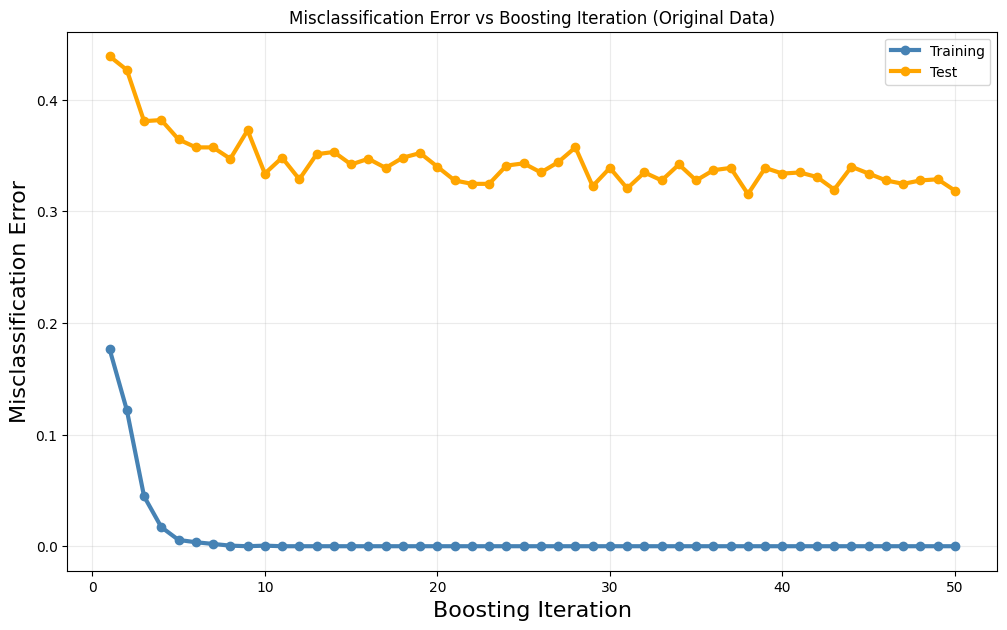

In [22]:
#Before cleaning
X_train, y_train = np.split(train_wine,[-1],axis=1)
X_test, y_test = np.split(test_wine,[-1],axis=1)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Create adaboost classifer object
#svc=SVC(probability=True, kernel='sigmoid')
clf = AdaBoostClassifier(n_estimators=19, estimator=DecisionTreeClassifier(max_depth=12))
# Train Adaboost Classifer
model = clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test, y_pred))

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose()) | (y_pred+2 == y_test.transpose()) | (y_pred-2 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

stumps=50
train_error = np.zeros(stumps)
test_error = np.zeros(stumps)
points = np.zeros(stumps)
for n in range(stumps):
    clf = AdaBoostClassifier(n_estimators=(n+1), estimator=DecisionTreeClassifier(max_depth=12))
    model=clf.fit(X_train,y_train.values.ravel())
    train_predict = model.predict(X_train)
    train_error[n] = 1-metrics.accuracy_score(train_predict,y_train)
    test_predict = clf.predict(X_test)
    test_error[n] = 1-metrics.accuracy_score(test_predict,y_test)
    points[n] = n+1
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(points, train_error, marker="o", color="steelblue", lw=3, label="Training")
ax.plot(points, test_error, marker="o", color="orange", lw=3, label="Test")
ax.set_xlabel("Boosting Iteration", fontsize=16)
ax.set_ylabel("Misclassification Error", fontsize=16)
ax.set_title("Misclassification Error vs Boosting Iteration (Original Data)")
plt.xticks(range(0,stumps+1,10))
ax.legend()
ax.grid(alpha=0.25)

# AdaBoost
The following code is AdaBoost utilizing the data after cleaning

Accuracy for exact classification: 0.654994850669413
Accuracy for prediction within +/- 1 of actual: 0.96086508753862
Accuracy for prediction within +/- 2 of actual: 0.995880535530381


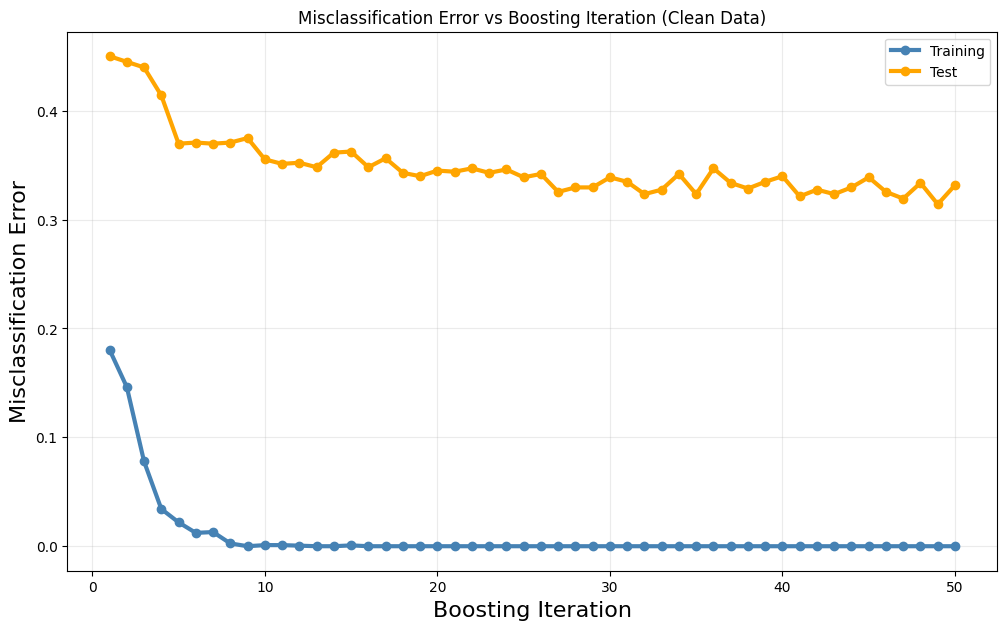

In [23]:
# After cleaning
X_train_clean, y_train_clean = np.split(train_wine_clean,[-1],axis=1)
X_test_clean, y_test_clean = np.split(test_wine_clean,[-1],axis=1)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Create adaboost classifer object
#svc=SVC(probability=True, kernel='sigmoid')
clf = AdaBoostClassifier(n_estimators=22, estimator=DecisionTreeClassifier(max_depth=12))
# Train Adaboost Classifer
model = clf.fit(X_train_clean, y_train_clean.values.ravel())

#Predict the response for test dataset
y_pred = model.predict(X_test_clean)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test_clean, y_pred))

accuracy = ((y_pred == y_test_clean.transpose()) | (y_pred+1 == y_test_clean.transpose()) | (y_pred-1 == y_test_clean.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test_clean.transpose()) | (y_pred+1 == y_test_clean.transpose()) | (y_pred-1 == y_test_clean.transpose()) | (y_pred+2 == y_test_clean.transpose()) | (y_pred-2 == y_test_clean.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

stumps=50
train_error = np.zeros(stumps)
test_error = np.zeros(stumps)
points = np.zeros(stumps)
for n in range(stumps):
    clf = AdaBoostClassifier(n_estimators=(n+1), estimator=DecisionTreeClassifier(max_depth=12))
    model=clf.fit(X_train_clean,y_train_clean.values.ravel())
    train_predict = model.predict(X_train_clean)
    train_error[n] = 1-metrics.accuracy_score(train_predict,y_train_clean)
    test_predict = clf.predict(X_test_clean)
    test_error[n] = 1-metrics.accuracy_score(test_predict,y_test_clean)
    points[n] = n+1
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(points, train_error, marker="o", color="steelblue", lw=3, label="Training")
ax.plot(points, test_error, marker="o", color="orange", lw=3, label="Test")
ax.set_xlabel("Boosting Iteration", fontsize=16)
ax.set_ylabel("Misclassification Error", fontsize=16)
ax.set_title("Misclassification Error vs Boosting Iteration (Clean Data)")
plt.xticks(range(0,stumps+1,10))
ax.legend()
ax.grid(alpha=0.25)

# SVM
The following code is SVM utilizing the data before cleaning

In [24]:
# Hyperparameter tuning before cleaning
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
#param_grid={'C':[0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32],'gamma':[0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32]}
#I dropped the range down so it would run faster for peer review
param_grid={'C':[4,8,16],'gamma':[0.5,1,2]}
grid = GridSearchCV(svm.SVC(),param_grid)
grid.fit(X_train,y_train.values.ravel())

scores = cross_val_score(grid, X_train, y_train.values.ravel(), scoring='accuracy', cv=3)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
print("Best parameters: ", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


cross-val mean-accuracy: 0.571
Best parameters:  {'C': 8, 'gamma': 1}
Best cross-validation accuracy: 0.60


In [25]:
#SVM before cleaning

nlsvm= svm.SVC(C=8.0, gamma=1.0,)
nlsvm.fit(X_train,y_train.values.ravel())
from sklearn.model_selection import cross_val_score
scores= cross_val_score(nlsvm, X_train, y_train.values.ravel(), scoring='accuracy', cv=3)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

y_pred=nlsvm.predict(X_test)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test, y_pred))

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose()) | (y_pred+2 == y_test.transpose()) | (y_pred-2 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

cross-val mean-accuracy: 0.573
Accuracy for exact classification: 0.6071428571428571
Accuracy for prediction within +/- 1 of actual: 0.9408163265306122
Accuracy for prediction within +/- 2 of actual: 0.9979591836734694


# SVM
The following code is SVM utilizing the data after cleaning

In [26]:
# Hyperparameter tuning after cleaning
from sklearn.model_selection import cross_val_score, GridSearchCV
#param_grid={'C':[0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32],'gamma':[0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32]}
#I dropped the range down so it would run faster for peer review
param_grid={'C':[4,8,16],'gamma':[0.5,1,2]}
grid = GridSearchCV(svm.SVC(),param_grid)
grid.fit(X_train,y_train.values.ravel())

scores = cross_val_score(grid, X_train_clean, y_train_clean.values.ravel(), scoring='accuracy', cv=3)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
print("Best parameters: ", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


cross-val mean-accuracy: 0.563
Best parameters:  {'C': 8, 'gamma': 1}
Best cross-validation accuracy: 0.60


In [27]:
#SVM after cleaning
from sklearn import svm
from sklearn.svm import SVC

nlsvm= svm.SVC(C=8.0, gamma=1.0,)
nlsvm.fit(X_train_clean,y_train_clean.values.ravel())
from sklearn.model_selection import cross_val_score
scores= cross_val_score(nlsvm, X_train_clean, y_train_clean.values.ravel(), scoring='accuracy', cv=3)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

y_pred=nlsvm.predict(X_test_clean)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test_clean, y_pred))

accuracy = ((y_pred == y_test_clean.transpose()) | (y_pred+1 == y_test_clean.transpose()) | (y_pred-1 == y_test_clean.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test_clean.transpose()) | (y_pred+1 == y_test_clean.transpose()) | (y_pred-1 == y_test_clean.transpose()) | (y_pred+2 == y_test_clean.transpose()) | (y_pred-2 == y_test_clean.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

cross-val mean-accuracy: 0.546
Accuracy for exact classification: 0.596292481977343
Accuracy for prediction within +/- 1 of actual: 0.9196704428424305
Accuracy for prediction within +/- 2 of actual: 0.9886714727085479


# SVC
The following code is SVC utilizing the data before cleaning

In [28]:
# Hyperparameter tuning before cleaning
param_grid={'C':[2^-6,0.03125,0.0625]}
grid = GridSearchCV(svm.LinearSVC(loss='squared_hinge', max_iter=10^6, dual='auto', tol=0.1, fit_intercept=False),param_grid)
grid.fit(X_train,y_train.values.ravel())

scores = cross_val_score(grid, X_train, y_train.values.ravel(), scoring='accuracy', cv=7)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
print("Best parameters: ", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to conver

cross-val mean-accuracy: 0.446
Best parameters:  {'C': 0.03125}
Best cross-validation accuracy: 0.45


/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by set

In [29]:
from sklearn.svm import LinearSVC
lsvm = svm.LinearSVC(loss='squared_hinge', C=0.03125, max_iter=10^6, dual='auto', tol=0.1, fit_intercept=False)
lsvm.fit(X_train,y_train.values.ravel())

scores= cross_val_score(lsvm, X_train, y_train.values.ravel(), scoring='accuracy', cv=5)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

y_pred=lsvm.predict(X_test)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test, y_pred))

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose()) | (y_pred+2 == y_test.transpose()) | (y_pred-2 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


cross-val mean-accuracy: 0.446
Accuracy for exact classification: 0.4561224489795918
Accuracy for prediction within +/- 1 of actual: 0.9336734693877551
Accuracy for prediction within +/- 2 of actual: 0.9989795918367347


/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# SVC
The following code is SVC utilizing the data after cleaning

In [30]:
# SVC Hyperparameter tuning after cleaning
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid={'C':[2^-6,0.03125,0.0625]}
grid = GridSearchCV(svm.LinearSVC(loss='squared_hinge', max_iter=10^6, dual='auto', tol=0.1, fit_intercept=False),param_grid)
grid.fit(X_train,y_train.values.ravel())

scores = cross_val_score(grid, X_train_clean, y_train_clean.values.ravel(), scoring='accuracy', cv=3)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
print("Best parameters: ", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to conver

cross-val mean-accuracy: 0.455
Best parameters:  {'C': 0.03125}
Best cross-validation accuracy: 0.45


In [31]:
#SVC after cleaning
lsvm = svm.LinearSVC(loss='squared_hinge', C=0.03125, max_iter=10^6, dual='auto', tol=0.1, fit_intercept=False)
lsvm.fit(X_train_clean,y_train_clean.values.ravel())
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lsvm, X_train_clean, y_train_clean.values.ravel(), scoring='accuracy', cv=3)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

y_pred=nlsvm.predict(X_test_clean)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test_clean, y_pred))

accuracy = ((y_pred == y_test_clean.transpose()) | (y_pred+1 == y_test_clean.transpose()) | (y_pred-1 == y_test_clean.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test_clean.transpose()) | (y_pred+1 == y_test_clean.transpose()) | (y_pred-1 == y_test_clean.transpose()) | (y_pred+2 == y_test_clean.transpose()) | (y_pred-2 == y_test_clean.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crank/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


cross-val mean-accuracy: 0.455
Accuracy for exact classification: 0.596292481977343
Accuracy for prediction within +/- 1 of actual: 0.9196704428424305
Accuracy for prediction within +/- 2 of actual: 0.9886714727085479


# Hybrid
The following code is the hybrid method utilizing the data before cleaning

In [32]:
#Hybrid
svc=SVC(probability=True, kernel='rbf')
clf = AdaBoostClassifier(n_estimators=50, estimator=svc)
# Train Adaboost Classifer
model = clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy for exact classification:",metrics.accuracy_score(y_test, y_pred))

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 1 of actual:",accuracy.mean())

accuracy = ((y_pred == y_test.transpose()) | (y_pred+1 == y_test.transpose()) | (y_pred-1 == y_test.transpose()) | (y_pred+2 == y_test.transpose()) | (y_pred-2 == y_test.transpose())).mean()
print("Accuracy for prediction within +/- 2 of actual:",accuracy.mean())

Accuracy for exact classification: 0.44387755102040816
Accuracy for prediction within +/- 1 of actual: 0.9306122448979591
Accuracy for prediction within +/- 2 of actual: 0.9979591836734694


The folloing code is looking at the clean data.  It was used to examine additional outliers

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     65.31
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           8.00e-16
Time:                        10:06:31   Log-Likelihood:                -6310.3
No. Observations:                4889   AIC:                         1.262e+04
Df Residuals:                    4887   BIC:                         1.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.7098      0.104     64.670

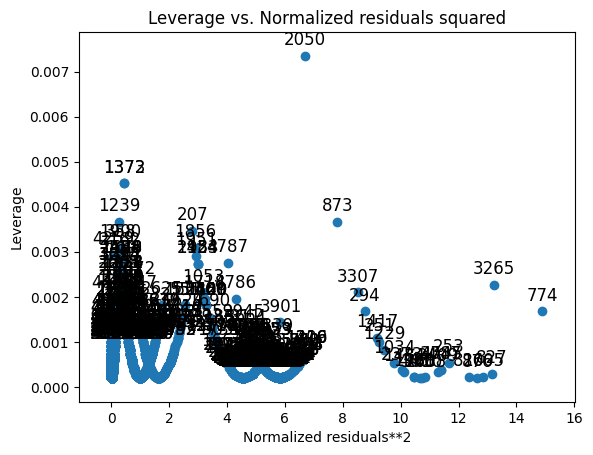

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     193.1
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           4.40e-43
Time:                        10:06:34   Log-Likelihood:                -6248.0
No. Observations:                4889   AIC:                         1.250e+04
Df Residuals:                    4887   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3592      0.037  

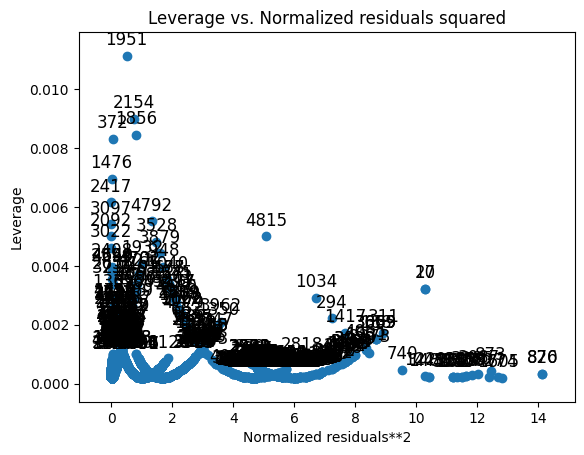

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     49.54
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           2.21e-12
Time:                        10:06:37   Log-Likelihood:                -6318.1
No. Observations:                4889   AIC:                         1.264e+04
Df Residuals:                    4887   BIC:                         1.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.9911      0.020    292.

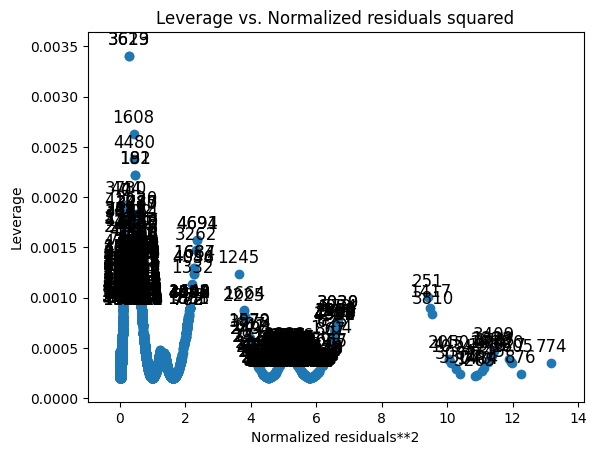

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     225.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           6.51e-50
Time:                        10:06:41   Log-Likelihood:                -6232.4
No. Observations:                4889   AIC:                         1.247e+04
Df Residuals:                    4887   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2672      0.029    218.045      0.0

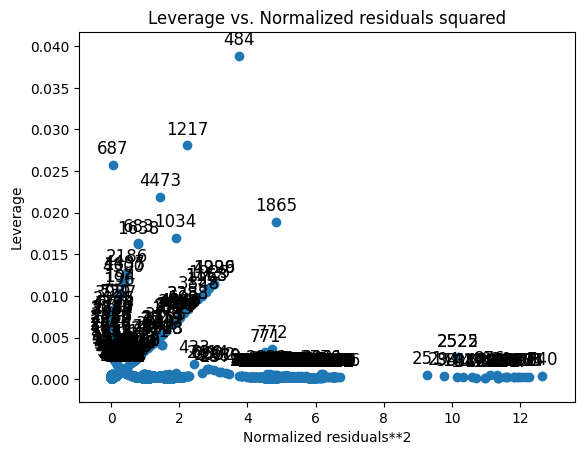

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     154.2
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           6.94e-35
Time:                        10:06:45   Log-Likelihood:                -6266.8
No. Observations:                4889   AIC:                         1.254e+04
Df Residuals:                    4887   BIC:                         1.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3815 

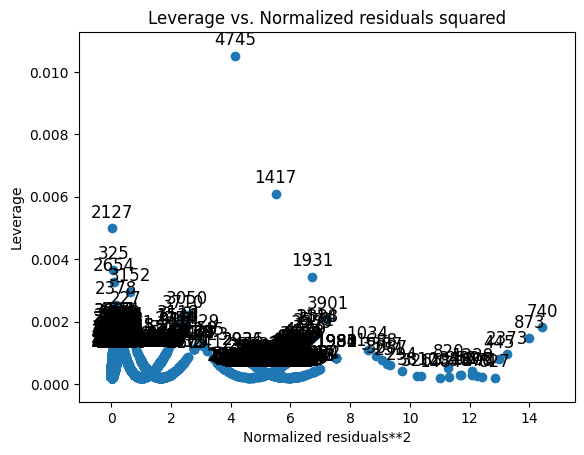

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     546.9
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          9.59e-115
Time:                        10:06:51   Log-Likelihood:                -6083.4
No. Observations:                4889   AIC:                         1.217e+04
Df Residuals:                    4887   BIC:                         1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0945      4.114     24.815      0.0

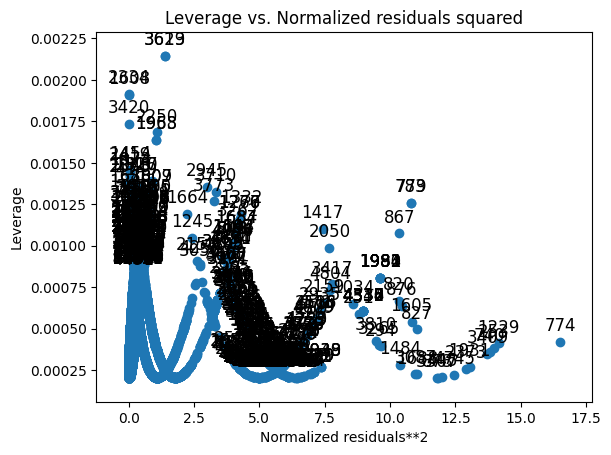

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     49.33
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           2.46e-12
Time:                        10:06:55   Log-Likelihood:                -6318.2
No. Observations:                4889   AIC:                         1.264e+04
Df Residuals:                    4887   BIC:                         1.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0093      0.266     15.056      0.0

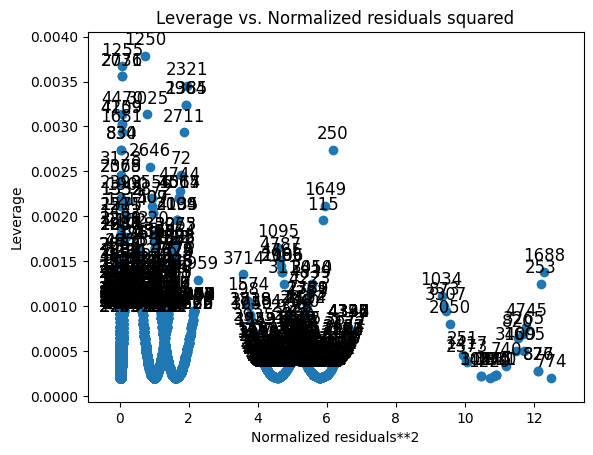

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     13.34
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           0.000262
Time:                        10:07:00   Log-Likelihood:                -6336.1
No. Observations:                4889   AIC:                         1.268e+04
Df Residuals:                    4887   BIC:                         1.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6782      0.056    101.375      0.0

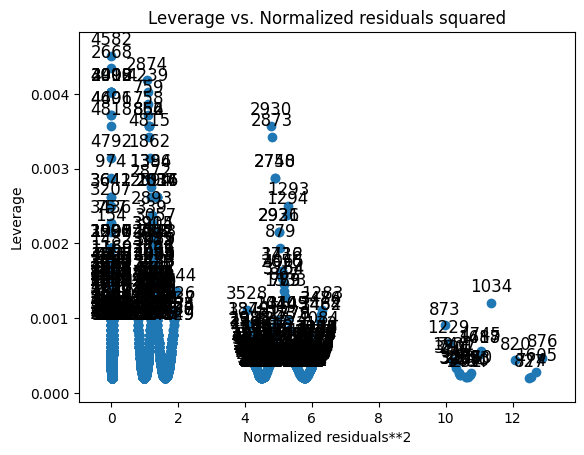

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1147.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          4.56e-226
Time:                        10:07:05   Log-Likelihood:                -5827.3
No. Observations:                4889   AIC:                         1.166e+04
Df Residuals:                    4887   BIC:                         1.167e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5729      0.098     26.193      0.0

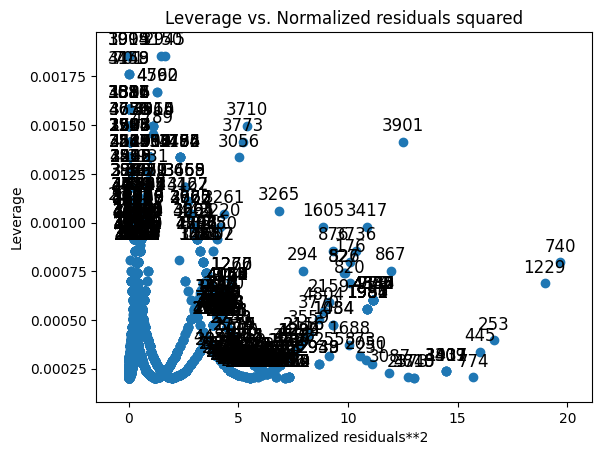

In [33]:
model = smf.ols(formula='quality ~ fixed_acidity', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ volatile_acidity', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ residual_sugar', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ chlorides', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ total_sulfur_dioxide', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ density', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ pH', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ sulphates', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()
model = smf.ols(formula='quality ~ alcohol', data=df_clean).fit()
print(model.summary())
sm.graphics.plot_leverage_resid2(model)
plt.show()

# Conclusions Discussion of learning and takeaways
I'm new to Python and Notebook, so I got a good look at both of them.  They are both much easier than I expected.

I'm an engineer, so the regression method was more familiar to me.  It was a lot of work.  The data had to be clean and analyzed in multiple ways.  The classification methods required less cleaning, less work programming, and with a +/-1 scoring system were much better.  Decision trees worked very well.  SVM and SVC had problems being fit to the data.  It is probably more of my inexperience with them.

It was good to see the various iteration methods from class applied to a real problem.  I was able to modify them in order to explore other settings and arrive at a more finely tuned end result.

I spent a lot of time online reading about sklearn and various way to improve the efficiency of my Python.

# Conclusions Discussion of why something didn’t work
In regression, the outliers had a large impact on the data.  Additionally, the data is unbalanced.  There are very few examples of what constitutes a very good or very poor wine.  These are both important categories.  Very poor isn't going to sell or will hurt someone's reputation, while very excellent is worth more money.  As can be seen in the pair plots, very high and very low quality data points are virtually nonexistent.  Additionally, there is no guarantee that the chemical features that truely define what makes a great wine great are included in this data set.  For this particular data, predicting that an average group of wines is average isn't much of an accomplishment.

# Conclusions Suggests ways to improve
The quality rating is an average of at least 3 scores.  It would be helpful to simply have the raw scores.  It would be also be helpful to know if individual scores were based on the min number of 3 or if some were 300.  The names of the wines would be interesting.  Wines with outliers could be retested.  It might also give insight into how subjective the taster's evaluation is.  In short, more data with more points on the high and low ends.  This data comes from a small region in Portugal.  It could be opened up to include more wines from more regions.